In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns


ModuleNotFoundError: No module named 'folium'

In [2]:
path = '~/galvanize/Capstone_1/git_info_wine_ratings/data/winemag-data-130k-v2.csv'
df = pd.read_csv(path, header = 'infer', sep = ',', index_col = 0)

In [7]:
cali = df.groupby('province').mean()
cali.loc['California']

points    88.627776
price     39.041048
Name: California, dtype: float64

In [8]:
ten_most_counted = df[['country','description']].groupby('country').count().sort_values('description', ascending = False).reset_index().head(10)
ten_least_counted = df[['country','description']].groupby('country').count().sort_values('description', ascending = True).reset_index().head(10)

In [9]:
def replace_val(df, index, col, string):
    '''
        parameters:
        unclean_df = dataframe
        index = integer row index where you wish to replace a value
        col = string col where value needs replacement
        string = what to replace in index:col
        
        return dataframe with replaced value
    '''
    df.loc[index,col] = string
    return df
              

replace_val(ten_least_counted ,4, 'country', 'Bosnia')

,country,description
0,China,1
1,Slovakia,1
2,Egypt,1
3,Armenia,2
4,Bosnia,2
5,Luxembourg,6
6,Switzerland,7
7,India,9
8,Cyprus,11
9,Czech Republic,12


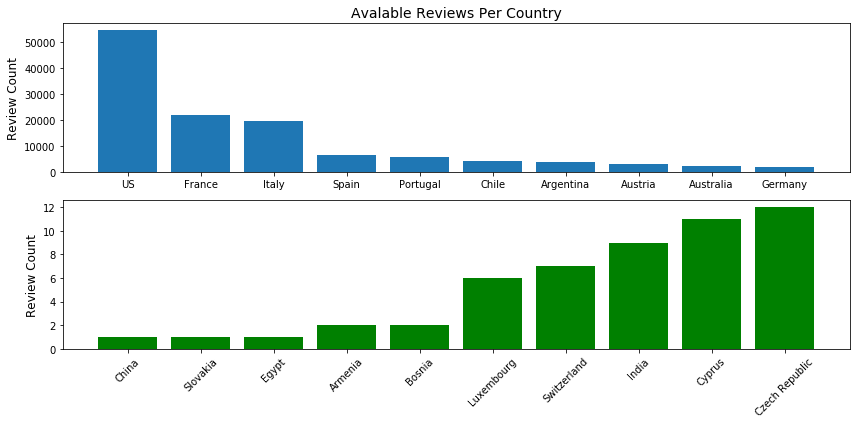

In [10]:

fig, axs = plt.subplots(2,1, figsize= (12,6))
axs[0].set_title('Avalable Reviews Per Country', fontsize = 14)
axs[0].bar(x = 'country', height = 'description', data = ten_most_counted)
axs[0].set_ylabel('Review Count', fontsize = 12)
axs[1].bar(x = 'country', height = 'description', data = ten_least_counted, align = 'center', color = 'green')
axs[1].set_ylabel('Review Count', fontsize = 12)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('top_least_rated_bar.png')
plt.show();

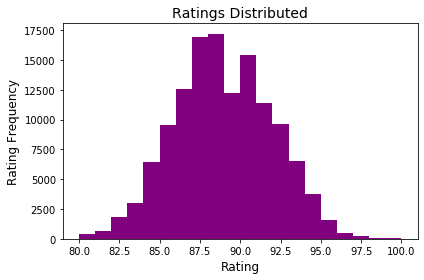

In [11]:
fig, ax = plt.subplots(1)
ax.hist(df['points'], bins = 20, color = 'purple')
ax.set_title('Ratings Distributed', fontsize = 14)
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Rating Frequency', fontsize = 12)
plt.tight_layout()
#plt.savefig('Original_rate_dist.png')
plt.show();

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [13]:
#Droping nan prices for price distribution
test_df = df[['country', 'price', 'description', 'points']]
test_df.dropna(axis = 0, how = 'any', subset = ['price'], inplace = True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120975 entries, 1 to 129970
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120916 non-null  object 
 1   price        120975 non-null  float64
 2   description  120975 non-null  object 
 3   points       120975 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/home/heather/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/heather/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


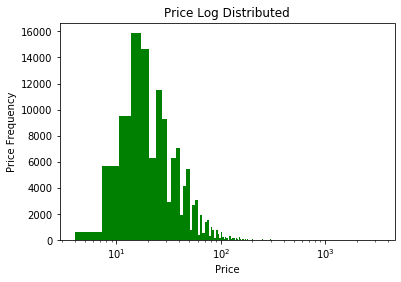

In [14]:
fig, ax = plt.subplots(1)
ax.hist(df['price'], bins = 1000, color = 'green')
ax.set_title('Price Log Distributed')
ax.set_xlabel('Price')
ax.set_ylabel('Price Frequency')
ax.set_xscale('log')
#plt.savefig('price_log_dist.png')
plt.show();

In [15]:
us_price = test_df['price'][test_df['country']=='US']
it_price = test_df['price'][test_df['country']=='Italy']
fr_price = test_df['price'][test_df['country']=='France']
sp_price = test_df['price'][test_df['country']=='Spain']
por_price = test_df['price'][test_df['country']=='Portugal']

count_data = [us_price, it_price, fr_price, sp_price, por_price]
count_lst = ['US', 'Italy', 'France', 'Spain', 'Portugal']

In [16]:
df.sort_values('price', ascending = False).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair


In [19]:
#look at price plots based on above and below mean rating of 88 points
below_mean_points = test_df['price'][test_df['points']>88]
above_mean_points = test_df['price'][test_df['points']<=88]

median_rating_diff = [below_mean_points, above_mean_points]
ratings = ['Rating at or above Average','Rating at or below Average']

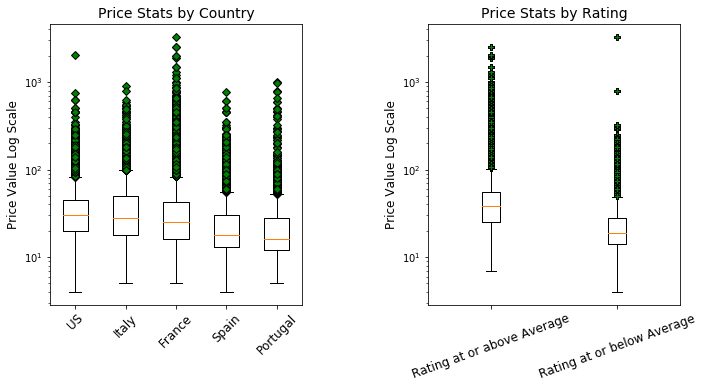

In [21]:
green_plus = dict(markerfacecolor='g', marker='P')
green_diamond = dict(markerfacecolor='g', marker='D')
fig, axs = plt.subplots(1,2, figsize=(10, 6))
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25, wspace = 0.5)

axs[0].boxplot(count_data,flierprops=green_diamond,)
axs[0].set_xticklabels(np.repeat(count_lst, 1),
                    rotation=45, fontsize=12)
axs[0].set_title('Price Stats by Country', fontsize = 14)
axs[0].set_ylabel('Price Value Log Scale', fontsize = 12)
axs[0].set_yscale('log')
axs[1].boxplot(median_rating_diff, flierprops=green_plus,)
axs[1].set_xticklabels(np.repeat(ratings, 1),
                       rotation = 20, fontsize=12)
axs[1].set_title('Price Stats by Rating', fontsize = 14)
axs[1].set_ylabel('Price Value Log Scale', fontsize = 12)
axs[1].set_yscale('log')
#plt.savefig('price_box.png')
plt.show();

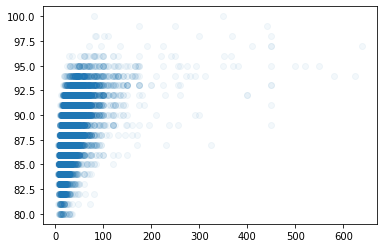

In [21]:
samp = df.sample(10000)

plt.scatter('price', 'points', data = samp, alpha= 0.05)
plt.show()

In [23]:
def drop_null_rows(col, df):
        '''
        parameters:
        unclean_df =  specific data frame
        col = list of columns for which you wish to drop null values

        returns:
        dataframe as is with dropped rows on particular colum
        '''
        df.dropna(axis = 0, how = 'any', subset = col, inplace = True)
        return df

drop_null_rows(['price'], df)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [24]:
stats.pearsonr(df['price'], df['points'])

(0.41616674186062286, 0.0)

In [29]:
expensive = df[df['price']>200]
cheap = df[df['price']<200]
print(stats.pearsonr(cheap['price'], cheap['points']))
print(stats.pearsonr(expensive['price'], expensive['points']))

(0.5390540613086919, 0.0)
(0.1620171659724978, 2.1238368465889445e-05)
